In [1]:
name = "Diaulas Murize Santana Vieira Marcondes"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)



Name:  Diaulas Murize Santana Vieira Marcondes

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
from tensorflow.keras.datasets import mnist


print ("Numpy versão      = ", np.__version__)
print ("Tensorflow versão = ", __import__("tensorflow").__version__)
print ("Sklearn versão    = ", skl.__version__)
print ("Pandas versão     = ", pd.__version__)
print ("Python versão     = ", __import__("platform").python_version())

pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings('ignore')


Numpy versão      =  1.21.5
Tensorflow versão =  2.9.1
Sklearn versão    =  1.1.1
Pandas versão     =  1.4.2
Python versão     =  3.10.4


In [3]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

print(X_train_ori.shape, y_train_ori.shape)
print(X_test_ori.shape, y_test_ori.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


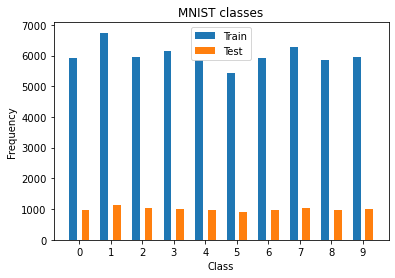

In [4]:
labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train_ori, return_counts=True)
uniquet, countst = np.unique(y_test_ori, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

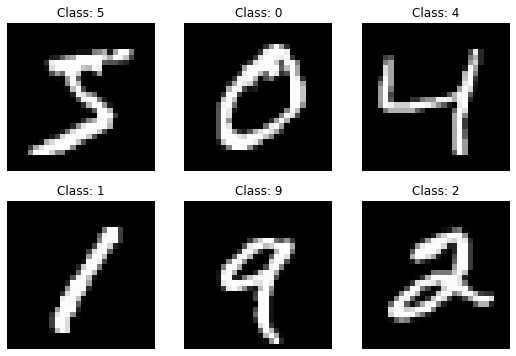

In [5]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_ori[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [6]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train_ori])
X_test  = np.array([image[::2, 1::2] for image in X_test_ori])

y_train = y_train_ori
y_test = y_test_ori

print(X_train.shape)

(60000, 14, 14)


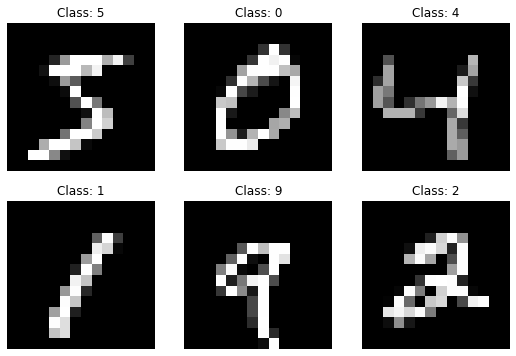

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [8]:
X_train = (X_train/255.0).astype('float32').reshape((60000,14*14))
X_test = (X_test/255.0).astype('float32').reshape((10000,14*14))

print(X_train.dtype)
print(X_test.dtype)

print("\nShape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("\nMinimum value in X_train:", np.amin(X_train))
print("Maximum value in X_train:", np.amax(X_train))

print("\nMinimum value in X_test:", np.amin(X_test))
print("Maximum value in X_test:", np.amax(X_test))


float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


Na célula abaixo a função que cria a matriz de confusão colorida.

In [9]:
def create_confusion_matrix (y_val, y_predict, score, vmax, model):
    cm = skl.metrics.confusion_matrix(y_val, y_predict)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Blues_r',vmin=0,vmax=vmax);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = model+'\n\nAccuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

# 1. Dataset preparation

You must partition the original training set into 70% training (Dtrain) and 30% validation (Dval)
sets, in a stratifed way. Make sure to include code to verify that the generated partition is indeed
stratifed.

In [10]:
[N,d]   = X_train.shape

index = np.arange(N)
D_train, D_val, y_Dtrain, y_Dval, index_Dtrain, index_Dval = train_test_split(X_train, y_train, 
                                                                index, train_size=0.70, random_state=4, stratify=y_train)

print("Shape of X_train:  ", X_train.shape)
print("Shape of y_train:  ", y_train.shape)
print("Shape of D_train:  ", D_train.shape)
print("Shape of y_Dtrain: ", y_Dtrain.shape)
print("Shape of D_val:    ", D_val.shape)
print("Shape of y_Dval:   ", y_Dval.shape)

u, c_y_train = np.unique(y_train, return_counts=True)
u, c_y_dtrain = np.unique(y_Dtrain, return_counts=True)
print("Proportion of classes in y_train:  ", c_y_train[0:10]/len(y_train))
print()
print("Proportion of classes in y_Dtrain: ", c_y_dtrain[0:10]/len(y_Dtrain))
print()
print("Differences in proportions of classes in y_train and y_Dtrain: ", 
      np.abs(c_y_train[0:10]/len(y_train) - c_y_dtrain[0:10]/len(y_Dtrain)))
print()
print("Sum of proportions in y_train = ", sum(c_y_train[0:10]/len(y_train)))

Shape of X_train:   (60000, 196)
Shape of y_train:   (60000,)
Shape of D_train:   (42000, 196)
Shape of y_Dtrain:  (42000,)
Shape of D_val:     (18000, 196)
Shape of y_Dval:    (18000,)
Proportion of classes in y_train:   [0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]

Proportion of classes in y_Dtrain:  [0.09871429 0.11235714 0.09930952 0.10219048 0.09735714 0.09035714
 0.09864286 0.10440476 0.09752381 0.09914286]

Differences in proportions of classes in y_train and y_Dtrain:  [2.38095238e-06 9.52380952e-06 9.52380952e-06 7.14285714e-06
 9.52380952e-06 7.14285714e-06 9.52380952e-06 1.19047619e-05
 7.14285714e-06 7.14285714e-06]

Sum of proportions in y_train =  1.0000000000000002


# 2. Training, evaluating and selecting models

You will use Dtrain to train and select three models: a logistic regression model, a neural network
model, and a SVM model.

The training/evaluation/selection process must use only data in Dtrain. Each of these three
algorithms have hyperparameters. You may fix or test different values for the hyperparameters.
Whether further partition of Dtrain is needed or not, this is left to your judgement.

The training/evaluation/selection process must use only data in Dtrain. Each of these three
algorithms have hyperparameters. You may fix or test different values for the hyperparameters.
Whether further partition of Dtrain is needed or not, this is left to your judgement.

Overall, it is expected that you will implement a model selection method. For that, you can use
implementations available in the scikit-learn library. The model selection can be based on
performance metrics of your choice.

You must explain the method you are using to select the models, including comments on which
hyperparameters you are evaluating (if you used solutions avaliable elsewhere as references,
please provide full information about them).

Clearly indicate and justify the selected three models.

In [11]:
#Logistic Regression

model_lgreg = LogisticRegression()
solvers_lgreg = ['newton-cg','lbfgs', 'liblinear']
c_values_lgreg = [100.0, 50.0, 10.0, 5.0, 1.0, 0.1, 0.01] 
grid_lgreg = dict(solver=solvers_lgreg,C=c_values_lgreg,random_state=[4])

time_lgreg = time.time()
grid_search_lgreg = GridSearchCV(estimator=model_lgreg, param_grid=grid_lgreg, scoring='accuracy',verbose=2, 
            cv=skl.model_selection.StratifiedKFold(n_splits=2,random_state=4,shuffle=True).split(D_train,y_Dtrain))
grid_result_lgreg = grid_search_lgreg.fit(D_train, y_Dtrain) 

time_lgreg = time.time() - time_lgreg

pd.DataFrame(grid_result_lgreg.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['rank_test_score'])

Fitting 2 folds for each of 21 candidates, totalling 42 fits
[CV] END ..........C=100.0, random_state=4, solver=newton-cg; total time= 2.1min
[CV] END ..........C=100.0, random_state=4, solver=newton-cg; total time= 1.7min
[CV] END ..............C=100.0, random_state=4, solver=lbfgs; total time=   5.6s
[CV] END ..............C=100.0, random_state=4, solver=lbfgs; total time=   5.4s
[CV] END ..........C=100.0, random_state=4, solver=liblinear; total time=  17.7s
[CV] END ..........C=100.0, random_state=4, solver=liblinear; total time=  17.6s
[CV] END ...........C=50.0, random_state=4, solver=newton-cg; total time= 1.1min
[CV] END ...........C=50.0, random_state=4, solver=newton-cg; total time= 1.2min
[CV] END ...............C=50.0, random_state=4, solver=lbfgs; total time=   5.2s
[CV] END ...............C=50.0, random_state=4, solver=lbfgs; total time=   5.5s
[CV] END ...........C=50.0, random_state=4, solver=liblinear; total time=  14.1s
[CV] END ...........C=50.0, random_state=4, solv

KeyboardInterrupt: 

In [ ]:
#SVM

model_SVM = SVC()
kernel_SVM = ['linear','poli', 'rbf', 'sigmoid']
c_values_SVM = [100.0, 50.0, 10.0, 5.0, 1.0, 0.1, 0.01] 
grid_SVM = dict(kernel=kernel_SVM,C=c_values_SVM,random_state=[4])

time_SVM = time.time()
grid_search_SVM = GridSearchCV(estimator=model_SVM, param_grid=grid_SVM, scoring='accuracy',verbose=2, 
            cv=skl.model_selection.StratifiedKFold(n_splits=2,random_state=4,shuffle=True).split(D_train,y_Dtrain))
grid_result_SVM = grid_search_SVM.fit(D_train, y_Dtrain) 

time_SVM = time.time() - time_SVM


pd.DataFrame(grid_result_SVM.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['rank_test_score'])

A próxima célula possui os métodos com os parâmetros retornados pelo GridSearchCV. Isso somente para ganhar tempo não tendo que executar o GridSearchCV sempre.

In [ ]:
#Neural Network

model_NN = MLPClassifier()
activation_NN = ['logistic', 'tanh', 'relu']
alpha_NN = [1e-4, 1e-3, 1e-2, 0.1, 1.0]
solver_NN = ['lbfgs', 'sgd', 'adam']
grid_NN = dict(activation=activation_NN,alpha=alpha_NN, 
                solver=solver_NN,random_state=[4])

time_NN = time.time()
grid_search_NN = GridSearchCV(estimator=model_NN, param_grid=grid_NN, scoring='accuracy',verbose=2, 
               cv=skl.model_selection.StratifiedKFold(n_splits=2,random_state=4,shuffle=True).split(D_train,y_Dtrain))
grid_result_NN = grid_search_NN.fit(D_train, y_Dtrain) 

time_NN = time.time() - time_NN

pd.DataFrame(grid_result_NN.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['rank_test_score'])

In [ ]:
print("Runtime to find parameters for the Logistic Regression model = ", time_lgreg, "segundos")

print("Runtime to find parameters for the SVM model                 = ", time_SVM, "segundos") 

print("Runtime to find parameters for the Neural Network model      = ", time_NN, "segundos")

print("Total runtime to find parameter of models                   = ", time_lgreg + time_SVM + time_NN, "segundos" )

# 3. Choosing a final model

In this step, the goal is to evaluate - on the validation set (Dval) - the three models selected in
the previous step.

Compare the performance computed with respect to (Dval) with the ones obtained in the previous step. Comment the comparison results. In particular, it is expected that the linear model
will work as a baseline. Comment the performance of the other models when compared to the
linear model.

Clearly indicate and justify the chosen final model.

In [ ]:
y_Dval_predict_lgreg = grid_result_lgreg.predict(D_val)
y_Dval_predict_SVM   = grid_result_SVM.predict(D_val)
y_Dval_predict_NN    = grid_result_NN.predict(D_val)

score_Dval_lgreg = grid_result_lgreg.score(D_val,y_Dval)
score_Dval_SVM   = grid_result_SVM.score(D_val,y_Dval)
score_Dval_NN    = grid_result_NN.score(D_val,y_Dval)

create_confusion_matrix(y_Dval, y_Dval_predict_lgreg, score_Dval_lgreg, 2000,'Logistic Regression')
create_confusion_matrix(y_Dval, y_Dval_predict_SVM, score_Dval_SVM, 2000, 'SVM')
create_confusion_matrix(y_Dval, y_Dval_predict_NN, score_Dval_NN,2000, 'Neural Network')

final_model            = grid_result_lgreg if score_Dval_lgreg > score_Dval_SVM else grid_result_SVM
score_Dval_final_model = score_Dval_lgreg  if score_Dval_lgreg > score_Dval_SVM else score_Dval_SVM

final_model            = grid_result_NN if score_Dval_NN > score_Dval_final_model else final_model
score_Dval_final_model = score_Dval_NN  if score_Dval_NN > score_Dval_final_model else score_Dval_final_model

final_model = final_model.best_estimator_
print("Best model is: ", final_model)

# 4. Error estimation

Now that you have chosen the final model, you can compute an estimate of its expected per-
formance (Eout and other metrics/analysis). Note that this is the only part of your code where
you will use the test set.

The model you will evaluate here on the test set is the one that presented the best validation
error with respect to Dval. Therefore it might be interesting to compare how similar or how
different are the performance metrics computed on Dtest and Dval.

You may also retrain the selected model on Dtrain [ Dval and verify if there is any significant
difference.

In [ ]:
score_Xtest_final_model = final_model.score(X_test,y_test)

y_Xtest_predict_final_model    = final_model.predict(X_test)
y_Dval_predict_final_model     = final_model.predict(D_val)


In [ ]:
print('Acurracy X_test  = ', skl.metrics.accuracy_score(y_test,y_Xtest_predict_final_model))
print('E_out (X_test)   = ', 1.0 - skl.metrics.accuracy_score(y_test,y_Xtest_predict_final_model))
print('Acurracy D_val   = ', skl.metrics.accuracy_score(y_Dval,y_Dval_predict_final_model))
print('')

print('Precision X_test = ', skl.metrics.precision_score(y_test,y_Xtest_predict_final_model,average='macro'))
print('Precision D_val  = ', skl.metrics.precision_score(y_Dval,y_Dval_predict_final_model,average='macro'))
print('')

print('Recall X_test    = ', skl.metrics.recall_score(y_test,y_Xtest_predict_final_model,average='macro'))
print('Recall D_val     = ', skl.metrics.recall_score(y_Dval,y_Dval_predict_final_model,average='macro'))

create_confusion_matrix(y_test, y_Xtest_predict_final_model, score_Xtest_final_model, 1127, 'Final Model')


# Aqui estamos re-treinando o modelo final usando todo o conjunto de X_train

In [ ]:
final_model_total = final_model.fit(X_train,y_train)

In [ ]:
score_Xtest_final_model = final_model.score(X_test,y_test)

y_Xtest_predict_final_model    = final_model.predict(X_test)
y_Dval_predict_final_model     = final_model.predict(D_val)


In [ ]:
print('Acurracy X_test  = ', skl.metrics.accuracy_score(y_test,y_Xtest_predict_final_model))
print('E_out (X_test)   = ', 1.0 - skl.metrics.accuracy_score(y_test,y_Xtest_predict_final_model))
print('Acurracy D_val   = ', skl.metrics.accuracy_score(y_Dval,y_Dval_predict_final_model))
print('')

print('Precision X_test = ', skl.metrics.precision_score(y_test,y_Xtest_predict_final_model,average='macro'))
print('Precision D_val  = ', skl.metrics.precision_score(y_Dval,y_Dval_predict_final_model,average='macro'))
print('')

print('Recall X_test    = ', skl.metrics.recall_score(y_test,y_Xtest_predict_final_model,average='macro'))
print('Recall D_val     = ', skl.metrics.recall_score(y_Dval,y_Dval_predict_final_model,average='macro'))

create_confusion_matrix(y_test, y_Xtest_predict_final_model, score_Xtest_final_model, 1130, 'Final Model')


# Relatório

Aqui irei falar um pouco do que foi feito no EP acima, explicando e justificando algumas escolhas que merecem ser comentadas.

Antes das 4 partes que foram pedidas, temos a célula de importação de pacotes que foram usados no EP. Vale lembrar que o sklearn é uma biblioteca muito grande, então várias funções não são importadas direto no *"import sklearn"* e é preciso uma importação individual das funções direto dos subpacotes. Nessa mesma célula tem a configuração de *warnings*, onde foram retiradas as mensagens de *warning*, pois no gridsearchCV tinha algumas dessas mensagens, principalmente sobre o número máximo de iterações, deixava o EP com uma aparência feia e prejudicava na compreensão do mesmo. Além disso há uma configuração sobre o tamanho da coluna da tabela do pandas para ser possível observar tudo que gostaríamos nela.

As outras células antes do passo 1 são as que foram dadas já feitas como a extração do conjunto de treinamento e de teste, exceto pela ultima célula antes do passo 1 que é uma função que plota a matri\ de confusão colorida, usando o pacote *seaborn*, o que a deixa mais atrativa de olhar e que pode ser interessante de observar nos estudos dos modelos.

**Na parte 1 do EP (Dataset preparation)**

Basicamente nessa parte fazemos a divisão estratificada do X_train em D_train e D_val usando a função train_test_split do *sklearn*. Além disso, tem prints mostrando a proporção das classes em y_train e y_D_train mostrando que a divisão estratificada funcionou bem já que as diferenças das proporções entre y_train e y_D_train estão na ordem de 0.000001 (1e-6).

**Na parte 2 do EP (Training, evaluating and selecting models)**

Usamos GridSearchCV para treinar os modelos de regressão logística, SVM e rede neural. Para isso foi selecionados alguns conjuntos de parâmetros para que, entre eles, encontremos o melhor modelo. Dessa forma os parâmetros foram escolhidos de maneira que fosse possível treinar o problema com boas variações de parâmetros, com parâmetros indo de 0.01 a 100, por exemplo, e alguns parâmetros com todas as combinações possíveis, como por exemplo o parâmetro *solver* da regressão logistíca e rede neural. Poderíamos treinar os modelos com muitos mais parâmetros, mas como o modelo final, com esses parâmetros, já estava muito bom e também quanto mais parâmetros mais tempo de execução seria necessário, prefimos deixar desta maneira. Além disso, já dá pra perceber que foi entendido como encontrar um bom modelo usando a função GridSearchCV. 

Note que no nosso uso do GridSearchCV faz validação cruzada somente no D_train como foi pedido, guardando o D_val para a parte 3. Também foi calculada o tempo de execução das 3 chamadas do GridSearchCV.fit e mostradas na tela, pois achamos interessante. Além disso, usamos o pacote pandas para mostrar a tabela com os resultados para as chamadas do GridSearchCV.

Para escolher o conjunto de parâmetros melhor de cada modelo, usamos a acurácia (indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente) como pontuação.

Obs: Para o SVM foi usada o modelo svm.SVC que é o svm que podemos escolher diferentes *kernels*, em vez do linearsvc que o único *kernel* é o linear. Dessa forma, mesmo demorando mais tempo de execução para treinar, obtivemos um resultado melhor com o SVC do que com o linearsvc.

**Na parte 3 do EP (Choosing a final model)**

Nessa parte do EP calculamos a acurácia, em D_val, do modelo final de regressão logistíca, SVM e rede neural e plotamos as matrizes de confusão para cada modelo. Após isso, escolhemos como o modelo final, entre regressão logística, SVM e rede neural, aquele com maior valor de acurácia, que no caso foi SVM.

**Na parte 4 do EP (Error estimation)**

Nesta parte do trabalho avaliamos o modelo final no X_test. Para isso alem da acurácia e do E_out(1 - acurácia), usamos a precisão (dentre todas as classificações de classe Positivo que o modelo fez, quantas estão correta) e o recall (dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas). Dessa forma vemos como o modelo trabalho bem tanto no X_test como no D_val, onde acurácia, precisão e recall tiveram valores maiores que 0.97. Também printamos na tela a sua matriz de confusão no X_test.

Após isso, retreinamos o modelo final usando agora todo o X_train (D_train unido com o D_val) e fizemos a mesma coisa que fizemos acima. Vemos como o modelo foi melhor (não muito melhor, pois o modelo antes já estava ótimo), pois agora os valores e acurácia, precisão e recall tiveram valores maiores que 0.98. Além disso, vemos que o modelo não sofreu de *overfitting* no X_train, pois mesmo com valores quase perfeitos de acurácia, precisão e recall em D_val, o modelo também teve valores quase perfeitos em X_test.

**Conclusão**

Dividimos o conjunto de treinamento para fazer validação cruzada e treinamos 3 modelos ( regressão logística, SVM e rede neural) para vários conjuntos de parâmetros usando GridSearchCV do sklearn e escolhemos o com melhor acurácia entre todos para ser o nosso modelo final. Vimos que esse modelo final foi ótimo tanto em D_val como em X_test usando as métricas de acurácia, precisão e recall. Além disso, re-treinamos o modelo agora em X_train todo e vimos que o modelo continuou tendo ótimos resultados em D_val e X-test (foi até melhor).

Vale lembrar que usamos em todos os casos random_state=4 para que os resultados possam ser reproduzidos.

Neste trabalho aprendemos, como usar várias funções do *sklearn* e como treinar vários modelos encontrando o melhor. Aprendemos sobre métricas para medir o desempenho do modelo final e também aprendemos ainda mais sobre regressão logística, SVM e rede neural.

Esse trabalho foi feito somente por Diaulas Murize Santana Vieira Marcondes, mesmo podendo ser em dupla.
